In [15]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import datetime
import pandas_datareader as web
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

In [6]:
#Date range
start = datetime.datetime(2010, 1, 1)
end = datetime.date(2022, 1, 1)

In [8]:
#Getting the data
petr4 = web.get_data_yahoo('PETR4.SA', start, end)

In [9]:
petr4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,37.32,36.82,36.95,37.32,13303600.00,23.64
2010-01-05,37.43,36.80,37.38,37.00,21396400.00,23.44
2010-01-06,37.50,36.80,36.80,37.50,18720600.00,23.76
2010-01-07,37.45,37.07,37.27,37.15,10964600.00,23.54
2010-01-08,37.39,36.86,37.16,36.95,14624200.00,23.41


In [10]:
petr4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,28.42,28.15,28.33,28.33,28713600.00,28.33
2021-12-27,28.78,28.15,28.32,28.75,44227900.00,28.75
2021-12-28,29.28,28.70,29.01,28.78,30688100.00,28.78
2021-12-29,28.90,28.42,28.70,28.54,35508400.00,28.54
2021-12-30,28.70,28.39,28.55,28.45,43229100.00,28.45


In [11]:
#Plot function
def plot_stock(df, stock_name):
    plt.rcParams["figure.figsize"] = [14,5]
    plt.plot(df.index, df['Close'])
    plt.xlabel('Date')
    plt.ylabel('Value R$')
    plt.title(stock_name)

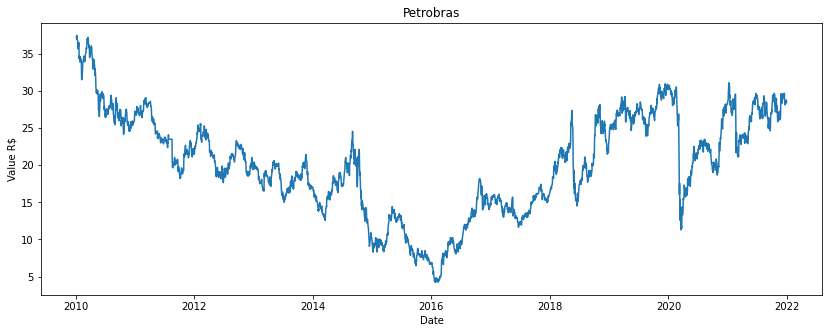

In [12]:
#Plotting PETR4
plot_stock(petr4, 'Petrobras')

In [20]:
#PETR4 dataset
data_petr4 = petr4.filter(['Close'])
dataset_petr4 = data_petr4.values
training_data_len_petr4 = math.ceil(len(data_petr4 * .8))

In [21]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset_petr4)

In [26]:
#Creating scaled training dataset
train_data = scaled_data[0:training_data_len_petr4, :]

#Splitting data x_train and y_train
#Prediction for stock closing price based on last 60 days
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)